## bulid graph

In [77]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [78]:
import re

In [79]:
l = "color or colour"

In [80]:
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [81]:
pattern.findall(l)

['color', 'colour']

In [82]:
def get_city_info(city_coordination):
    city_location={}
    for line in city_coordination.split('\n'):
        if line.startswith("//"):continue
        if line.strip() == "":continue
        
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float, x_y))
        city_location[city] = x_y
        
    return city_location

In [83]:
city_info = get_city_info(coordination_source)

In [84]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

## compute distince between cities

In [85]:
import math

In [86]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [87]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [88]:
get_city_distance('南京','上海')

303.6885955551885

## draw the graph

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [90]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [91]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

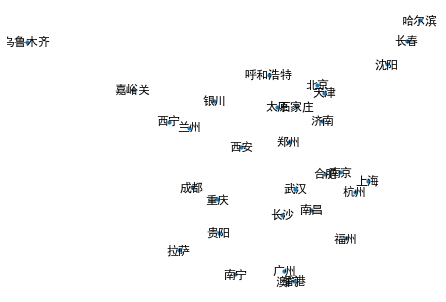

In [92]:
nx.draw(city_graph, city_info,with_labels=True,node_size=10)

In [93]:
threshold = 700

In [94]:
from collections import defaultdict

In [95]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    
    for c1 in cities:
        for c2 in cities:
            if c1 == c2:continue
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection           

In [96]:
cities_connection = build_connection(city_info)

In [97]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [98]:
cities_connection_graph = nx.Graph(cities_connection)

C:\Python\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


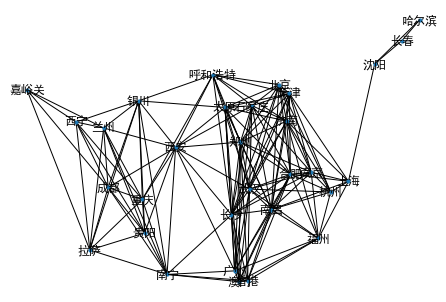

In [99]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

# BFS

In [136]:
def bfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
            
        successsors = graph[frontier]
        for city in successsors:
            if city in path: continue

            new_path = path+[city]
            pathes.append(new_path)  #bfs 后置
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:
                return new_path
            
        visited.add(frontier)

In [137]:
bfs(cities_connection,"上海","拉萨")

['上海', '济南', '长沙', '南宁', '拉萨']

In [138]:
bfs(cities_connection,"拉萨","北京")

['拉萨', '重庆', '呼和浩特', '北京']

In [139]:
def dfs(graph, start, destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path =pathes.pop(0)
        frontier = path[-1]
        if frontier in visited:continue
        
        successors = graph[frontier]
        for city in successors:
            if city in path:continue
                
            new_path = path + [city]
            pathes = [new_path] + path #dfs 前置
        
            if city == destination:
                return new_path
        
        visited.add(frontier)   

In [140]:
dfs(cities_connection,"北京","西安")

['北京', '呼和浩特', '西安']

In [141]:
dfs(cities_connection,"拉萨","西安")

['拉萨', '银川', '西安']

In [142]:
dfs(cities_connection,"拉萨","北京")

['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京']

In [144]:
bfs(cities_connection,"拉萨","北京")

['拉萨', '重庆', '呼和浩特', '北京']

## 里程数

In [186]:
def bfs_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        successor = graph[frontier]
        for city in successor:
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)#bfs
            
        pathes = search_strategy(pathes)
        if pathes and pathes[0][-1] == destination: # 非空+第一条路径的最后一个点
            return pathes[0]

In [187]:
def get_distance_of_path(path):
    distance = 0
    for i, _ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [188]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [189]:
get_distance_of_path(['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京'])

2712.9416789339675

In [190]:
def sort_by_destance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i, _ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes, key=get_distance_of_path)

In [191]:
bfs_2(cities_connection,"北京","上海",search_strategy=sort_by_destance)

['北京', '天津', '上海']

In [192]:
bfs_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [193]:
bfs(cities_connection,"北京","上海")

['北京', '济南', '上海']

In [194]:
get_distance_of_path(bfs_2(cities_connection,"北京","上海",search_strategy=lambda x:x))

752.66259009181

In [195]:
get_distance_of_path(bfs_2(cities_connection,"北京","上海",search_strategy=sort_by_destance))

732.5085345714293

# machine learning

In [36]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

In [37]:
dataset = load_boston()

In [42]:
x,y=dataset['data'],dataset['target']

In [43]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [46]:
x.shape

(506, 13)

In [47]:
y.shape

(506,)

In [48]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [50]:
X_rm = x[:,5]

In [51]:
X_rm.shape

(506,)

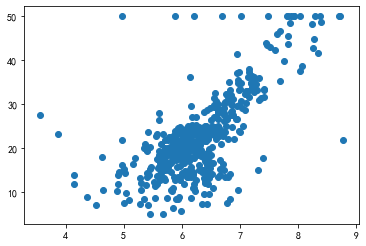

In [71]:
#plt x_rm in respect to y
plt.scatter(X_rm,y)

## Gradient descent

$$ y=k*rm+b $$

In [72]:
# define target function
def price(rm, k, b):
    return rm * k + b

## define mean square loss

$$ loss = \frac{1}{n}\sum{(y_i - \hat{y_i})}^2 $$

$$ loss = \frac{1}{n}\sum{(y_i - (kx_i + b_i))}^2 $$

In [73]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

## define partial derivation

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i-\hat{y_i})x_i}$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum{(y_i-\hat{y_i})}$$

In [74]:
# define partial derivation
def partial_derivative_k(x,y,y_hat):
    n =len(y)
    gradient=0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient

In [75]:
def partial_derivative_b(y,y_hat):
    n =len(y)
    gradient=0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2/n * gradient

In [97]:
#初始化
k = random.random() * 200 -100 # random:0-1. k,b:-100-100
b = random.random() * 200 -100
learning_rate = 1e-3 # 学习斜率
iteration_number=300
losses=[]

#梯度下降递归
for i in range(iteration_number):
    y_hat = [price(r,k,b) for r in X_rm] 
    current_loss = loss(y,y_hat)
    losses.append(current_loss)
    print("Iteration {}, the loss is {},parameters k is{} & b is {}".format(i,current_loss,k,b))

    k_gradient = partial_derivative_k(X_rm, y, y_hat)
    b_gradient = partial_derivative_b(y, y_hat)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate

best_k = k
best_b = b

Iteration 0, the loss is 2366.9022959223807,parameters k is24.078935922766107 & b is -81.75422630782327
Iteration 1, the loss is 2006.2030001466153,parameters k is23.47291602751752 & b is -81.84830685998152
Iteration 2, the loss is 1702.2027647594432,parameters k is22.916547308624352 & b is -81.93458202408925
Iteration 3, the loss is 1445.9889143774153,parameters k is22.405760624050327 & b is -82.01369148990317
Iteration 4, the loss is 1230.0497806538724,parameters k is21.936820316675107 & b is -82.0862225216605
Iteration 5, the loss is 1048.0544742741458,parameters k is21.50629688367074 & b is -82.15271425459163
Iteration 6, the loss is 894.6672751737963,parameters k is21.111041885748495 & b is -82.21366163931366
Iteration 7, the loss is 765.391199249814,parameters k is20.74816491270837 & b is -82.2695190629628
Iteration 8, the loss is 656.4361552345677,parameters k is20.415012436767825 & b is -82.32070367355836
Iteration 9, the loss is 564.6078263397558,parameters k is20.109148398957

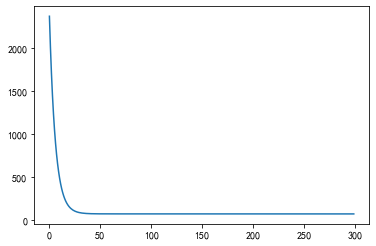

In [98]:
plt.plot(list(range(iteration_number)),losses)

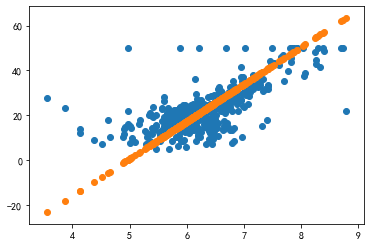

In [99]:
price_best_paraments = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_best_paraments)